In [1]:
import os, sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/walu/mdwarfs/ae_classifier/')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/ae_models')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/classifier_models')
#from save_recon_plots import save_recon_plots
import data_processor as dp
from dwarf_trainer import DwarfTrainer

In [2]:
dpc = dp.DataProcessing('../training_data/PULS_NonPULS_unbalanced.csv', input_dataset_shape=1024)


Shape of loaded data: (48717, 1026)
Label Mapping:
'NonPULS' -> 0
'PULS' -> 1
Input shape: 1024
Train set size: 34102
Validation set size: 14615
Number of classes: 2
Data processing completed.


In [3]:
"""
'lr' sets the learning rate for autoencoder and classifier
if separate learning rate for AE and classifier is needed, 
set lr for AE learning rate, and classifier_lr 
for classifier learning rate
"""

trainer = DwarfTrainer(
    data_processor= dpc,
    ae_model = 'nets_1024_bens_transpose',
    classifier_model = 'binary_classifier',
    model_id = 'binary_unbalanced_bens_transposed_attention',
    batch_size = 256,
    num_epochs = 3000,
    lr = 1e-3,
    classifier_lr = 1e-4,
    scheduler_type = None,
    leaky_relu_a= 0.1,
    min_delta = 1e-6,
    patience = 300,
    training_mode = 'joint',
    ae_epochs = 1000,
    class_weighted_loss= True,
    save_val_recons= True
)

selected encoder: encode(
  (unflatten): Unflatten(dim=1, unflattened_size=(1, 32))
  (leakyrelu): LeakyReLU(negative_slope=0.1)
  (en_layer1): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer2): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer3): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer4): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Leaky

In [15]:
#trainer.set_classifier_lr(.5e-4)
trainer.set_lr(.5e-4)
#trainer.__setattr__('ae_epochs', 200)
trainer.train_and_validate()

Joint training mode: training autoencoder and classifier together.
Epoch [1/3000], Train Recon: 3.5557, Train Class: 0.4306, Val Recon: 10.8215, Val Class: 0.3989, Val Recall: 0.8912,
Epoch [2/3000], Train Recon: 3.5557, Train Class: 0.4333, Val Recon: 6.2956, Val Class: 0.3990, Val Recall: 0.8942,
Epoch [3/3000], Train Recon: 3.5540, Train Class: 0.4320, Val Recon: 6.4518, Val Class: 0.3980, Val Recall: 0.8938,
Epoch [4/3000], Train Recon: 3.5528, Train Class: 0.4324, Val Recon: 4.0214, Val Class: 0.3979, Val Recall: 0.8926,
Epoch [5/3000], Train Recon: 3.5503, Train Class: 0.4311, Val Recon: 3.6812, Val Class: 0.3975, Val Recall: 0.8938,
Epoch [6/3000], Train Recon: 3.5494, Train Class: 0.4320, Val Recon: 5.3770, Val Class: 0.3990, Val Recall: 0.8907,
Epoch [7/3000], Train Recon: 3.5471, Train Class: 0.4315, Val Recon: 3.3998, Val Class: 0.4005, Val Recall: 0.8898,
Epoch [8/3000], Train Recon: 3.5461, Train Class: 0.4305, Val Recon: 6.6029, Val Class: 0.3957, Val Recall: 0.8949,
Epoc

In [27]:
import torch
torch.save(trainer.model.state_dict(), f'model_binary_unbalanced_bens_transposed/best_model.pth')

In [18]:
trainer.load_best_model('model_binary_unbalanced_bens_transposed_attention/best_model.pth')

Loaded model from model_binary_unbalanced_bens_transposed_attention/best_model.pth


In [19]:
trainer.utils._validate()

{'val_recon_loss': 4.733774694903143,
 'val_class_loss': tensor(0.3951),
 'val_accuracy': 0.8657543619568936,
 'val_precision': 0.716462281679673,
 'val_recall': 0.8984156570363467,
 'val_f1': 0.797188339880091}

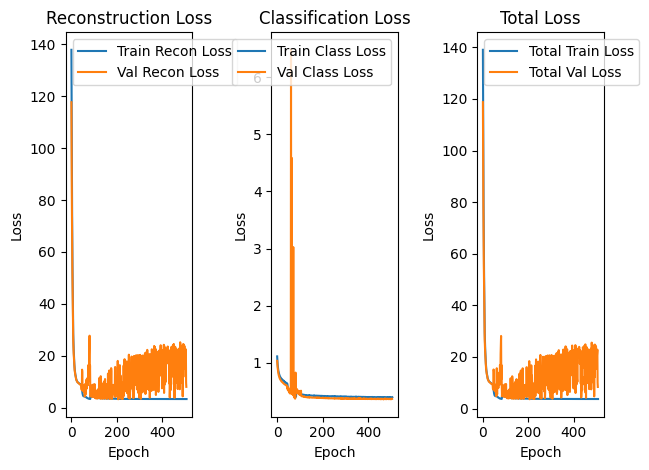

In [16]:
trainer.plot_losses()

Plotting accuracies for 507 epochs.


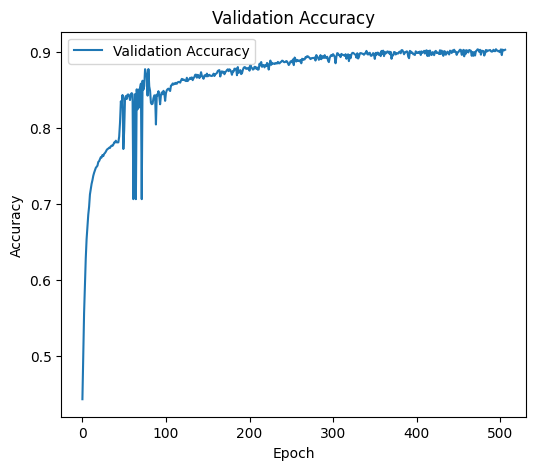

<Figure size 800x600 with 0 Axes>

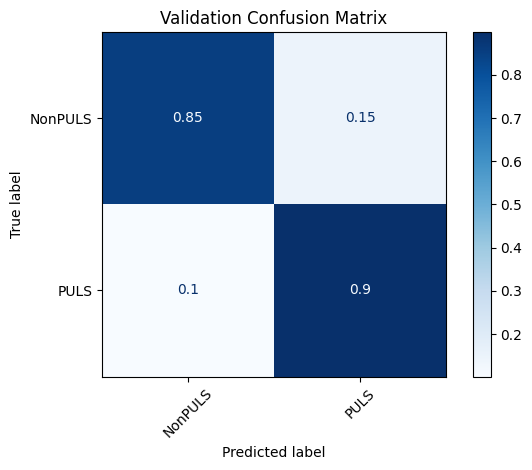

In [20]:
trainer.plot_accuracy()
trainer.plot_confusion_matrix()